# SlicedLHD Basic Example

Demonstrates maximin-distance Sliced Latin Hypercube Designs for space-filling computer experiments.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from slicedlhd import maximinSLHD, SLHDResult
from slicedlhd.construction import random_slhd
from slicedlhd.objective import compute_phi
from slicedlhd.utils import is_valid_slhd

plt.rcParams["figure.facecolor"] = "white"

## 1. Standard maximin LHD (t=1)

A single slice yields a standard maximin-distance Latin Hypercube Design.

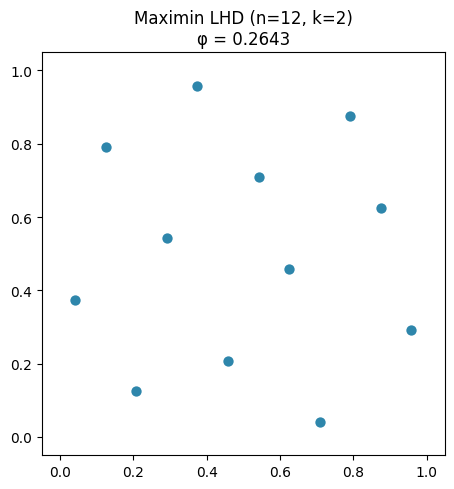

In [4]:
result = maximinSLHD(t=1, m=12, k=2, random_state=42, total_iter=50_000)

fig, ax = plt.subplots(figsize=(5, 5))
D = result.std_design
ax.scatter(D[:, 0], D[:, 1], s=80, c="#2e86ab", edgecolors="white", linewidths=1.5, zorder=3)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_aspect("equal")
ax.set_title(f"Maximin LHD (n=12, k=2)\nφ = {result.measure:.4f}")
plt.tight_layout()
plt.show()

## 2. Sliced LHD (t > 1)

Multiple slices: each slice is a valid LHD, useful for qualitative factors.

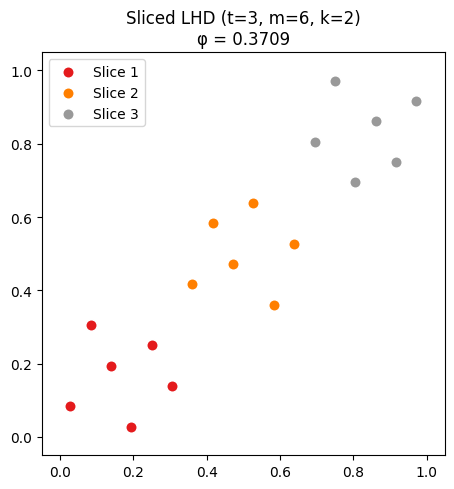

In [5]:
result = maximinSLHD(t=3, m=6, k=2, random_state=42, total_iter=50_000)

fig, ax = plt.subplots(figsize=(5, 5))
D = result.std_design
slices = D[:, 0].astype(int)
colors = plt.cm.Set1(np.linspace(0, 1, result.n_slices))
for s in range(1, result.n_slices + 1):
    mask = slices == s
    ax.scatter(D[mask, 1], D[mask, 2], s=70, c=[colors[s - 1]], label=f"Slice {s}",
               edgecolors="white", linewidths=1.2, zorder=3)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_aspect("equal")
ax.legend()
ax.set_title(f"Sliced LHD (t=3, m=6, k=2)\nφ = {result.measure:.4f}")
plt.tight_layout()
plt.show()

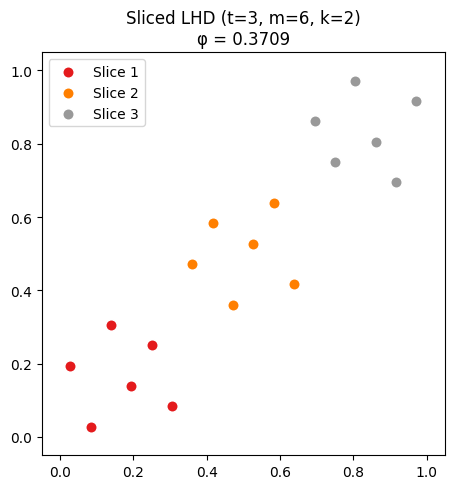

In [9]:
result = maximinSLHD(t=3, m=6, k=2, random_state=17, total_iter=50_000)

fig, ax = plt.subplots(figsize=(5, 5))
D = result.std_design
slices = D[:, 0].astype(int)
colors = plt.cm.Set1(np.linspace(0, 1, result.n_slices))
for s in range(1, result.n_slices + 1):
    mask = slices == s
    ax.scatter(D[mask, 1], D[mask, 2], s=70, c=[colors[s - 1]], label=f"Slice {s}",
               edgecolors="white", linewidths=1.2, zorder=3)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_aspect("equal")
ax.legend()
ax.set_title(f"Sliced LHD (t=3, m=6, k=2)\nφ = {result.measure:.4f}")
plt.tight_layout()
plt.show()

## 3. 3D design

Higher-dimensional design with a 2D projection.

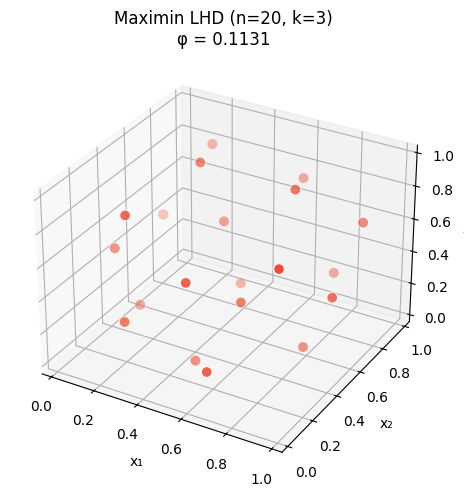

In [6]:
result = maximinSLHD(t=1, m=20, k=3, random_state=123, total_iter=80_000)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection="3d")
D = result.std_design
ax.scatter(D[:, 0], D[:, 1], D[:, 2], s=60, c="#e94f37", edgecolors="white", linewidths=0.8)
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_zlabel("x₃")
ax.set_title(f"Maximin LHD (n=20, k=3)\nφ = {result.measure:.4f}")
plt.tight_layout()
plt.show()

## 4. Random vs optimized

Compare φ (lower = better spread) for random construction vs simulated annealing.

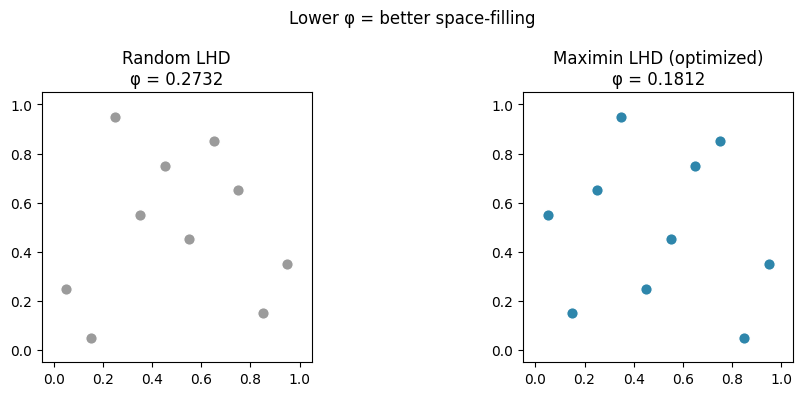

In [7]:
rng = np.random.default_rng(42)
D_rand = random_slhd(t=1, m=10, k=3, rng=rng)
result_opt = maximinSLHD(t=1, m=10, k=3, random_state=42, total_iter=50_000)

phi_rand = compute_phi(D_rand.astype(float), r=15)
phi_opt = result_opt.measure

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
D_rand_std = (D_rand - 0.5) / 10
axes[0].scatter(D_rand_std[:, 0], D_rand_std[:, 1], s=70, c="#9b9b9b", edgecolors="white", linewidths=1)
axes[0].set_title(f"Random LHD\nφ = {phi_rand:.4f}")
axes[0].set_xlim(-0.05, 1.05)
axes[0].set_ylim(-0.05, 1.05)
axes[0].set_aspect("equal")

D_opt = result_opt.std_design
axes[1].scatter(D_opt[:, 0], D_opt[:, 1], s=70, c="#2e86ab", edgecolors="white", linewidths=1)
axes[1].set_title(f"Maximin LHD (optimized)\nφ = {phi_opt:.4f}")
axes[1].set_xlim(-0.05, 1.05)
axes[1].set_ylim(-0.05, 1.05)
axes[1].set_aspect("equal")
plt.suptitle("Lower φ = better space-filling")
plt.tight_layout()
plt.show()

## 5. Validation & API summary

Verify SLHD constraint and inspect `SLHDResult`.

In [8]:
result = maximinSLHD(t=2, m=5, k=3, random_state=99)
# Raw design has slice column when t > 1
design_raw = result.design
is_valid = is_valid_slhd(design_raw[:, 1:], t=2, m=5)

print(f"design shape: {result.design.shape}")
print(f"std_design shape: {result.std_design.shape}")
print(f"measure (φ): {result.measure:.4f}")
print(f"n_slices: {result.n_slices}, n_per_slice: {result.n_per_slice}, n_dims: {result.n_dims}")
print(f"Valid SLHD: {is_valid}")
print(f"\nFirst 5 rows of design:\n{result.design[:5]}")

design shape: (10, 4)
std_design shape: (10, 4)
measure (φ): 0.2723
n_slices: 2, n_per_slice: 5, n_dims: 3
Valid SLHD: True

First 5 rows of design:
[[1 3 5 2]
 [1 5 3 4]
 [1 2 4 5]
 [1 1 1 3]
 [1 4 2 1]]
